In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Load data
# top row is SXWY (Season X Week Y), followed by the data
df = pd.read_excel('weekly commanders.xlsx', header=0)
# df = pd.read_excel('test.xlsx', header=0)

KeyboardInterrupt: 

In [104]:
# Get a list of every unique commander across all weeks (from A2 to D6 or wherever the end is)
commanders = df.iloc[0:, 0:].values.flatten()
commanders = pd.unique(commanders)
# Remove NaNs
commanders = commanders[~pd.isnull(commanders)]

print(commanders)
print(len(commanders))

['Jinnie Fay, Jetmirs Second' 'Balmor, Battlemage Captain'
 'Uro, Titan of Natures Wrath' 'The First Sliver'
 'Chandra, Dressed to Kill' 'Korvold, Fae-Cursed King' 'Niv-Mizzet Reborn'
 'Chatterfang, Squirrel General' 'Sheoldred, the Apocalypse'
 'Chandra, Torch of Defiance' 'Rusko, Clockmaker' 'Evelyn, the Covetous'
 'Niv-Mizzet, Parun' 'Atraxa, Grand Unifier' 'Teferi, Hero of Dominaria'
 'Esika, God of the Tree' 'Ghalta, Primal Hunger'
 'Ragavan, Nimble Pilferer' 'Volo, Guide to Monsters' 'Kykar, Winds Fury'
 'Raffine, Scheming Seer' 'Shanna, Purifying Blade'
 'Adeline, Resplendent Cathar' 'Old Stickfingers' "Sythis, Harvest's Hand"
 'Kinnan, Bonder Prodigy' 'Tazri, Beacon of Unity'
 'Yawgmoth, Thran Physician' 'Ral, Storm Conduit'
 'Nissa, Ascended Animist' 'Kaya, Intangible Slayer'
 'Emry, Lurker of the Loch' 'Geist of Saint Traft'
 'Thalia, Guardian of Thraben' 'Nicol Bolas, Dragon-God'
 "Kroxa, Titan of Death's Hunger" 'Gix, Yawgmoth Praetor'
 'Kiora, Behemoth Beckoner' 'Elesh Nor

In [105]:
# Create a table where each row is a commander and each column is a week with the count of how many times that commander was played that week
table = pd.DataFrame(index=commanders, columns=df.columns[0:])
for commander in commanders:
    for week in df.columns[0:]:
        table.loc[commander, week] = df[week].str.contains(commander).sum()

# Sort the table by the total number of times each commander was played
table['Total'] = table.sum(axis=1)
table = table.sort_values(by='Total', ascending=False)


# Print the table
print(table)

                            S1W1 S1W2 S1W3 S1W4 S2W1 S2W2 S2W3 S2W4 S3W1 S3W2  \
Raffine, Scheming Seer         0    0    1    2    1    0    1    0    0    1   
Rusko, Clockmaker              0    0    0    0    0    0    0    0    0    0   
Teferi, Hero of Dominaria      2    2    1    1    1    0    2    0    0    0   
Atraxa, Grand Unifier          0    0    0    0    0    0    0    0    0    0   
Kinnan, Bonder Prodigy         0    0    1    0    1    1    1    1    1    1   
...                          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Killian, Ink Duelist           0    0    0    0    0    1    0    0    0    0   
Laezel, Wrathful Warrior       0    0    0    0    0    0    1    0    0    0   
Tezzeret the Schemer           0    0    0    0    0    0    0    0    0    0   
Minsc & Boo, Timeless Heros    1    0    0    0    0    0    0    0    0    0   
Ognis, the Dragons Lash        0    0    0    0    0    0    0    0    0    0   

                           

In [121]:
# Generate a table with the number of times each commander was played during each 4-week period
# The first column is the commander name, the second column is the number of times that commander was played in weeks 1-4, the third column is the number of times that commander was played in weeks 5-8, etc.
table2 = pd.DataFrame(index=commanders)

print(len(table.columns) // 4)

for i in range(0, len(table.columns) // 4):
    table2['Season ' + str(i+1) + ' Weeks ' + str(i * 4 + 1) + '-' + str(i * 4 + 4)] = table.iloc[:, i * 4:i * 4 + 4].sum(axis=1)

print(table2)


6
                            Season 1 Weeks 1-4 Season 2 Weeks 5-8  \
Jinnie Fay, Jetmirs Second                   1                  0   
Balmor, Battlemage Captain                   3                  0   
Uro, Titan of Natures Wrath                  1                  1   
The First Sliver                             1                  1   
Chandra, Dressed to Kill                     3                  3   
...                                        ...                ...   
Hinata, Dawn-Crowned                         0                  0   
Cormela, Galmour Thief                       0                  0   
Queen Kayla bin-Kroog                        0                  0   
Chevill, Bane of Monsters                    0                  0   
Ognis, the Dragons Lash                      0                  0   

                            Season 3 Weeks 9-12 Season 4 Weeks 13-16  \
Jinnie Fay, Jetmirs Second                    0                    0   
Balmor, Battlemage Captai

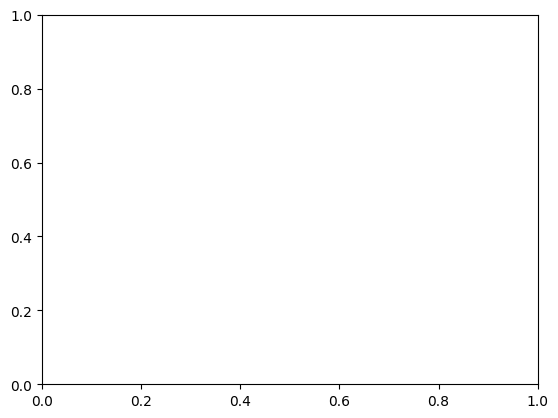

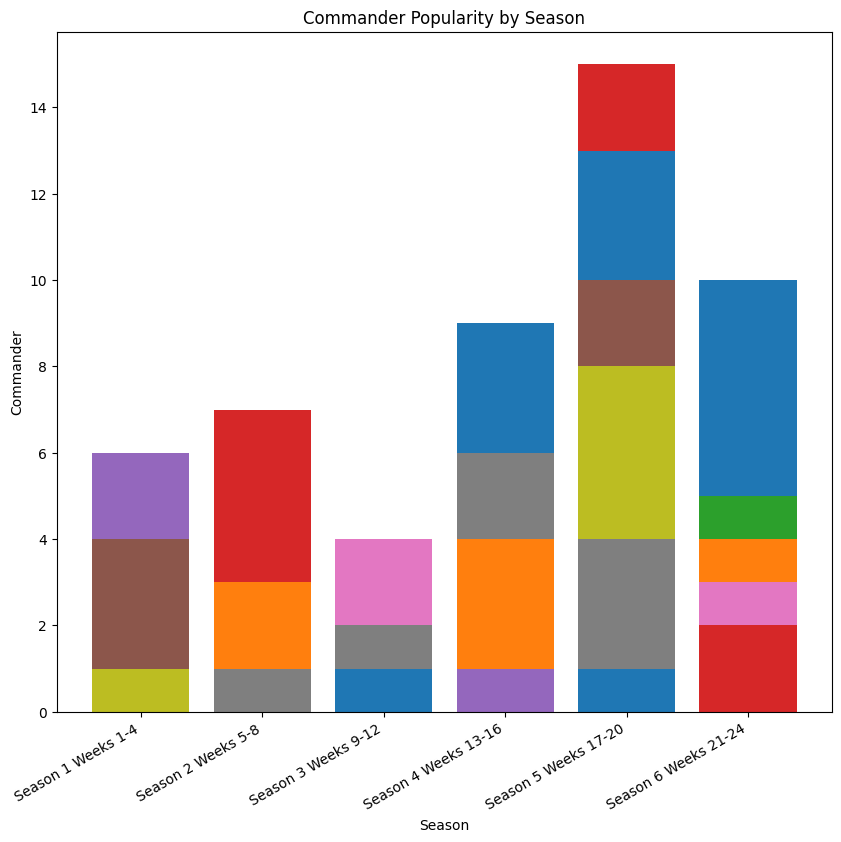

In [122]:

# Set up a stacked bar chart
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Commander Popularity by Season')
ax.set_xlabel('Season')
ax.set_ylabel('Commander')



# Plot the data for each commander
for commander in commanders:
    # Filter out commanders with less than 10 plays
    if table.loc[commander, 'Total'] >= 1:
        # Add to stacked bar chart
        ax.bar(table2.columns, table2.loc[commander, :], label=commander)

# slant labels
fig.autofmt_xdate()

    